# ASSIGNMENT 3.1
## Submitted by: FARHAN ASIF (A23052200097)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NHAIAccidentData-1.csv')

In [3]:
df.shape

(91, 18)

In [4]:
df.columns

Index(['Date', 'TimeOfAcc', 'AccLocation', 'NatureAccident',
       'ClassificationOfAccident', 'Causes', 'RoadFeature', 'RoadCondition',
       'IntersectionTypeControl', 'WeatherCondition', 'VehicleResponsible',
       'Fatal', 'Grevious', 'Minor', 'Injured', 'NumAnimalsKilled',
       'HelpProvidedByAmbulancePatrol', 'Remarks'],
      dtype='object')

In [5]:
df.head()

,Date,TimeOfAcc,AccLocation,NatureAccident,ClassificationOfAccident,Causes,RoadFeature,RoadCondition,IntersectionTypeControl,WeatherCondition,VehicleResponsible,Fatal,Grevious,Minor,Injured,NumAnimalsKilled,HelpProvidedByAmbulancePatrol,Remarks
0,9/6/2015,09:00 AM,Ch. 69+5006,2,2,2,2,1,9,1,One Diesel Truck collapsed,0,2,1,0,0,Petrol Vehicle,NaN
1,9/5/2014,07:18 AM,72+500,7,1,2,2,3,9,1,Lorry & Scorpio,2,0,0,0,0,Ambulance,NaN
2,9/10/2014,08:50 AM,20+250 LHS,4,-,3,3,1,9,1,LCV (KA02 AD 4041) HIT CAR (KA 19 Z 8477),0,0,0,0,0,Petrol Vehicle,NO PROPERTY DAMAGES. INFORMED KEY PERSONS.
3,8/9/2015,05:00 AM,NaN,1,2,2,1,3,9,1,Lorry Truck,0,1,1,0,0,Petrol Vehicle,NaN
4,8/4/2015,08:23 AM,126.800 KM RHS,2,2,2,4,4,9,1,Car,0,2,1,1,0,Petrol Vehicle,A car upside due to over speed


## Q1)

Preprocessing

In [6]:
df = df.drop(df[df['ClassificationOfAccident'] == '-'].index)

In [7]:
df.loc[df['Causes'] == '-', 'Causes'] = 5

In [8]:
df = df.drop(columns=['VehicleResponsible','HelpProvidedByAmbulancePatrol','Remarks'])

In [9]:
df.shape

(83, 15)

Separating data on the basis of year of accident

In [10]:
dates = [pd.Timestamp(x) for x in df['Date']]

In [11]:
df_2014 = df[np.array(dates) < pd.Timestamp('2015-01-01')]
df_2015 = df[np.array(dates) > pd.Timestamp('2014-12-31')]

print('Records in 2014: ' + str(df_2014.shape[0]))
print('Records in 2015: ' + str(df_2015.shape[0]))

Records in 2014: 33
Records in 2015: 50


Drop date and time columns

In [12]:
df_2014 = df_2014.drop(columns = ['Date', 'TimeOfAcc', 'AccLocation'])
df_2015 = df_2015.drop(columns = ['Date', 'TimeOfAcc', 'AccLocation'])

Split data into train and test dataset

In [13]:
X_train_2014 = df_2014.drop(columns = ['ClassificationOfAccident'])
Y_train_2014 = df_2014['ClassificationOfAccident']

X_test_2015 = df_2015.drop(columns = ['ClassificationOfAccident'])
Y_test_2015 = df_2015['ClassificationOfAccident']

In [14]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(
    n_estimators = 100,
    max_depth = 12,
    oob_score = True,
    random_state = 0
)

In [15]:
rfc.fit(X_train_2014, Y_train_2014)

RandomForestClassifier(max_depth=12, oob_score=True, random_state=0)

In [16]:
pred_2014 = rfc.predict(X_train_2014)
pred_2015 = rfc.predict(X_test_2015)

In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

Evaluation metrics on train dataset

In [18]:
print("Accuracy: " + str(accuracy_score(Y_train_2014, pred_2014)))

Accuracy: 1.0


In [19]:
print("Precision score: " + str(precision_score(Y_train_2014, pred_2014, average = 'weighted')))

Precision score: 1.0


In [20]:
print("Recall: " + str(recall_score(Y_train_2014, pred_2014, average = 'weighted')))

Recall: 1.0


In [21]:
print("F1 Score: " + str(f1_score(Y_train_2014, pred_2014, average = 'weighted')))

F1 Score: 1.0


In [22]:
print("Classification Report: \n" + classification_report(Y_train_2014, pred_2014))

Classification Report: 
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         4

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



Evaluation metrics on test dataset

In [23]:
print("Accuracy: " + str(accuracy_score(Y_test_2015, pred_2015)))

Accuracy: 0.62


In [24]:
print("Precision score: " + str(precision_score(Y_test_2015, pred_2015, average = 'weighted')))

Precision score: 0.5034784688995215


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
print("Recall: " + str(recall_score(Y_test_2015, pred_2015, average = 'weighted')))

Recall: 0.62


In [26]:
print("F1 Score: " + str(f1_score(Y_test_2015, pred_2015, average = 'weighted')))

F1 Score: 0.5525396825396826


In [27]:
print("Classification Report: \n" + classification_report(Y_test_2015, pred_2015))

Classification Report: 
              precision    recall  f1-score   support

           1       0.82      0.90      0.86        10
           2       0.58      0.65      0.61        17
           3       0.55      0.85      0.67        13
           4       0.00      0.00      0.00        10

    accuracy                           0.62        50
   macro avg       0.49      0.60      0.53        50
weighted avg       0.50      0.62      0.55        50



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test accuracy is 62%

## Q2)

In [28]:
df = pd.read_csv('NHAIAccidentData-1.csv')

In [29]:
AccLocation = df['AccLocation']

In [30]:
AccLocation = AccLocation.dropna()

In [31]:
AccLocation = pd.DataFrame([x.replace('+','.') for x in AccLocation])

In [32]:
proneLoc = AccLocation.value_counts()

<AxesSubplot:title={'center':'Most Prone Accident Locations'}, xlabel='0'>

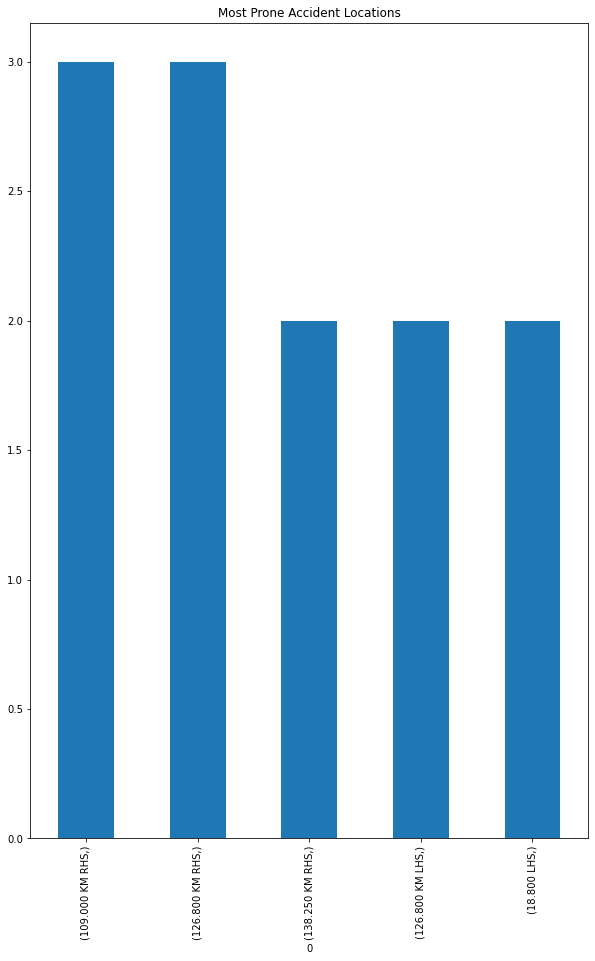

In [33]:
# Visualization
proneLoc.head().plot(kind = 'bar', title = 'Most Prone Accident Locations', figsize = (10,15))

## Q3)

In [34]:
feature_importances = rfc.feature_importances_
feature_importance = pd.DataFrame(feature_importances, index = X_train_2014.columns, columns=['Importance'])
feature_importance.sort_values('Importance', ascending = False, inplace = True)
feature_importance.head()

,Importance
Fatal,0.255871
Grevious,0.156828
Minor,0.152963
NatureAccident,0.140773
Causes,0.122761
